### Creating a graph in PyTorch

In [1]:
import torch
def compute_z(a, b, c):
  r1 = torch.sub(a,b)
  r2 = torch.mul(r1, 2)
  z = torch.add(r2, c)
  return z

In [2]:
print('Scalar Inputs:', compute_z(torch.tensor(1), torch.tensor(2), torch.tensor(3)))

Scalar Inputs: tensor(1)


In [3]:
print('Rank 1 Inputs:', compute_z(torch.tensor([1]), torch.tensor([2]), torch.tensor([3])))

Rank 1 Inputs: tensor([1])


In [4]:
print('Rank 2 Inputs:', compute_z(torch.tensor([[1]]), torch.tensor([[2]]), torch.tensor([[3]])))

Rank 2 Inputs: tensor([[1]])


### PyTorch tensor objects for storing and updating mode

In [5]:
#As of 2021 Tensor for floating point and complex dtype can require gradients
a = torch.tensor(3.14, requires_grad = True)
print(a)

tensor(3.1400, requires_grad=True)


In [6]:
b = torch.tensor([1.0, 2.0, 3.0], requires_grad = True)
print(b)

tensor([1., 2., 3.], requires_grad=True)


In [7]:
#require_grad is set to False by default

In [8]:
w = torch.tensor([1.0, 2.0, 3.0])
print(w.requires_grad)

False


In [9]:
w.requires_grad_()

tensor([1., 2., 3.], requires_grad=True)

#### Random Initialization of tensors using Glorot initialization

In [10]:
import torch.nn as nn
torch.manual_seed(1)
w = torch.empty(2, 3)# an empty tensor of size 2 * 3
nn.init.xavier_normal_(w)
print(w)

tensor([[ 0.4183,  0.1688,  0.0390],
        [ 0.3930, -0.2858, -0.1051]])


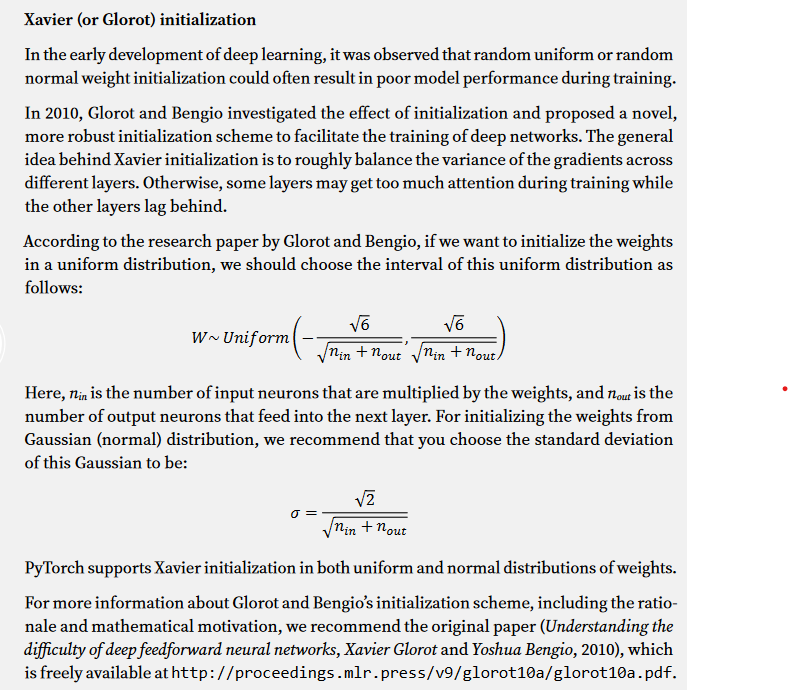

> Indented block



Sorce of above image: Machine Learning with pytorch and scikit learn(Packt)

In [11]:
#defining two Tensor objects inside the base nn.Module class

In [12]:
class MyModule(nn.Module):
  def __init__(self):
    super().__init__()
    self.w1 = torch.empty(2, 3, requires_grad = True)
    nn.init.xavier_normal(self.w1)
    self.w2 = torch.emplty(1, 2, requires_grad = True)
    nn.init.xavier_noram(self.w2)

#### Computing gradients via automatic differentiation

<li> Computing the gradients of the loss with respect to trainable variables</li>

---



In [53]:
w = torch.tensor(1.0, requires_grad = True)#trainable parameter = weight
b = torch.tensor(0.5, requires_grad = True)#trainable parameter = bias
x = torch.tensor([1.4])
y = torch.tensor([2.1])
z = torch.add(torch.mul(w, x), b)
loss = (y-z).pow(2).sum()
loss.backward()
print('dL/dw: ', w.grad)
print('dL/db: ', b.grad)

dL/dw:  tensor(-0.5600)
dL/db:  tensor(-0.4000)


In [54]:
#verifying the above computed gradient

In [55]:
print(2 * x * ((w*x + b) - y))

tensor([-0.5600], grad_fn=<MulBackward0>)


### Using nn.Sequential
The layers stored inside this model are connected in a cascaded way.

In [56]:
model = nn.Sequential(nn.Linear(4, 16),#Linear layer fully connected
                      nn.ReLU(),#activation Function
                      nn.Linear(16, 32),# 2nd fully connected layer
                      nn.ReLU())#2nd activation function

model

Sequential(
  (0): Linear(in_features=4, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=32, bias=True)
  (3): ReLU()
)

In [57]:
#Chosing Activation functions: https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity
#Initializing the layer paprameters: https://pytorch.org/docs/stable/nn.init.html
#Applying L2 regularization: https://pytorch.org/docs/stable/optim.html
#Applying L1 regularization:

In [58]:
#Configuring the first fully connected layer by speciying the initial value distribution for the weight
nn.init.xavier_uniform_(model[0].weight)#initialization of weight with Xavier initialization


Parameter containing:
tensor([[-0.0630,  0.2631, -0.1333, -0.1224],
        [-0.0573, -0.2156, -0.3755, -0.0615],
        [-0.1960, -0.1731, -0.2394,  0.2536],
        [-0.0890,  0.4219,  0.1605, -0.1823],
        [ 0.5450, -0.1711, -0.4619,  0.3681],
        [-0.3120,  0.3740,  0.4198, -0.1756],
        [-0.2166,  0.1918,  0.2738,  0.4274],
        [ 0.1402,  0.0421,  0.4794,  0.1267],
        [-0.4443, -0.1437, -0.0321,  0.1863],
        [-0.5256, -0.5446, -0.3120,  0.0701],
        [ 0.3716, -0.4563,  0.2270,  0.0286],
        [ 0.4835, -0.3058, -0.1707,  0.1776],
        [-0.5217,  0.3476, -0.2237,  0.1074],
        [-0.3417,  0.4394,  0.1672,  0.0680],
        [-0.2654, -0.3980,  0.0434, -0.3773],
        [-0.0230,  0.4770,  0.1541, -0.1507]], requires_grad=True)

4*16 tensor for first fully connected layer<br>
4 input layer neurons, 16 hidden layer nerurons

In [59]:
l1_weight = 0.01

In [60]:
model[2].weight

Parameter containing:
tensor([[ 0.2311,  0.0105,  0.2110, -0.1702,  0.0246, -0.0555, -0.2279, -0.1275,
         -0.0244, -0.2397,  0.1779, -0.1410, -0.0133, -0.0027, -0.2404, -0.1131],
        [ 0.0402, -0.0716,  0.1474,  0.0713,  0.0943,  0.1409,  0.0421, -0.2197,
          0.1089, -0.0701,  0.0513,  0.0843,  0.0715,  0.1812,  0.2318, -0.1837],
        [-0.1164,  0.1066, -0.0054,  0.0566, -0.2230, -0.1017, -0.0041,  0.2040,
         -0.1837,  0.0571,  0.0310, -0.1084,  0.1081,  0.2204,  0.2075, -0.0569],
        [-0.0114, -0.0104,  0.1465, -0.1349,  0.0622,  0.1438,  0.1429, -0.1006,
          0.1428, -0.2124, -0.0771,  0.2015, -0.1161,  0.0093,  0.2363,  0.0305],
        [-0.0015,  0.0606, -0.1780, -0.2465,  0.1182, -0.0268,  0.1134, -0.0128,
          0.1811, -0.1766, -0.1281, -0.2212, -0.2064,  0.1934, -0.0535, -0.1258],
        [-0.0796, -0.0208, -0.0759, -0.2377,  0.1706, -0.0141, -0.1800,  0.0715,
         -0.0783, -0.0675, -0.1986, -0.2444,  0.0748, -0.2231,  0.1622, -0.2266],


In [61]:
model[2].weight.abs().sum()

tensor(64.2035, grad_fn=<SumBackward0>)

In [62]:
l1_penalty = l1_weight * model[2].weight.abs().sum()

In [63]:
l1_penalty

tensor(0.6420, grad_fn=<MulBackward0>)

In [64]:
#model[0].weight

In [65]:
#nn.init.xavier_uniform(model[2].weight)

##### Chosing loss function
<li> Mean Square error(MSE): for regression problem</li>
<li> Cross-entropy family: Classification</li>
<li> Precision, Recall, Accuracy, Area under the curve, False negative, false positives: Classification</li><br>
Optimization
<li> SGD, Adam: most widely used methods</li>

In [66]:
loss_fn = nn.BCELoss()#Binary cross entropy loss
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

## Solving XOR classification problem


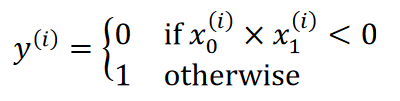

Dataset size = 200
Training set = 100
test set = 100

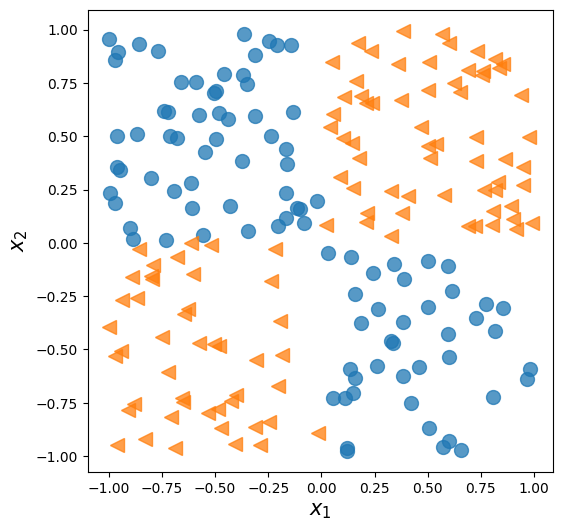

In [67]:
#code for generating data and splitting into train and validation
import matplotlib.pyplot as plt
import numpy as np
torch.manual_seed(1)
np.random.seed(1)
#generating the data
x = np.random.uniform(low = -1, high = 1, size = (200, 2))
y = np.ones(len(x))
y[x[:,0]* x[:,1] <0] =0 # as per the condition shown above in picture
n_train = 100
x_train = torch.tensor(x[:n_train, :], dtype = torch.float32)
y_train = torch.tensor(y[:n_train], dtype = torch.float32)
x_valid = torch.tensor(x[n_train:,:], dtype = torch.float32)
y_valid = torch.tensor(y[n_train:],dtype = torch.float32)
fig = plt.figure(figsize = (6,6))
plt.plot(x[y==0, 0], x[y==0, 1], 'o', alpha = 0.75, markersize=10)
plt.plot(x[y==1, 0], x[y==1, 1], '<', alpha = 0.75, markersize = 10)
plt.xlabel(r'$x_1$', size=15)
plt.ylabel(r'$x_2$', size=15)
plt.show()

In [68]:
#starting with a simple model
model = nn.Sequential(nn.Linear(2, 1), nn.Sigmoid())
model

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): Sigmoid()
)

In [69]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

In [70]:
#dataloader
from torch.utils.data import DataLoader, TensorDataset
train_ds = TensorDataset(x_train, y_train)
batch_size = 2
torch.manual_seed(1)
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [71]:
#Training for 200 epochs and recording the history
torch.manual_seed(1)
num_epochs = 200
def train(mode, num_epochs, train_dl, x_valid, y_valid):
  loss_hist_train = [0] * num_epochs
  accuracy_hist_train = [0] * num_epochs
  loss_hist_valid = [0] * num_epochs
  accuracy_hist_valid = [0] * num_epochs
  for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
      pred = model(x_batch)[:, 0]
      loss = loss_fn(pred, y_batch)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
      loss_hist_train[epoch] += loss.item()
      is_correct = ((pred>= 0.5).float() == y_batch).float()
      accuracy_hist_train[epoch] += is_correct.mean()
    loss_hist_train[epoch] /= n_train
    accuracy_hist_train[epoch] /= n_train/batch_size
    pred = model(x_valid)[:, 0]
    loss = loss_fn(pred, y_valid)
    loss_hist_valid[epoch] = loss.item()
    is_correct = ((pred>=0.5).float() == y_valid).float()
    accuracy_hist_valid[epoch] += is_correct.mean()
  return loss_hist_train, loss_hist_valid, accuracy_hist_train, accuracy_hist_valid

history = train(model, num_epochs, train_dl, x_valid, y_valid)





Text(0.5, 0, 'Epochs')

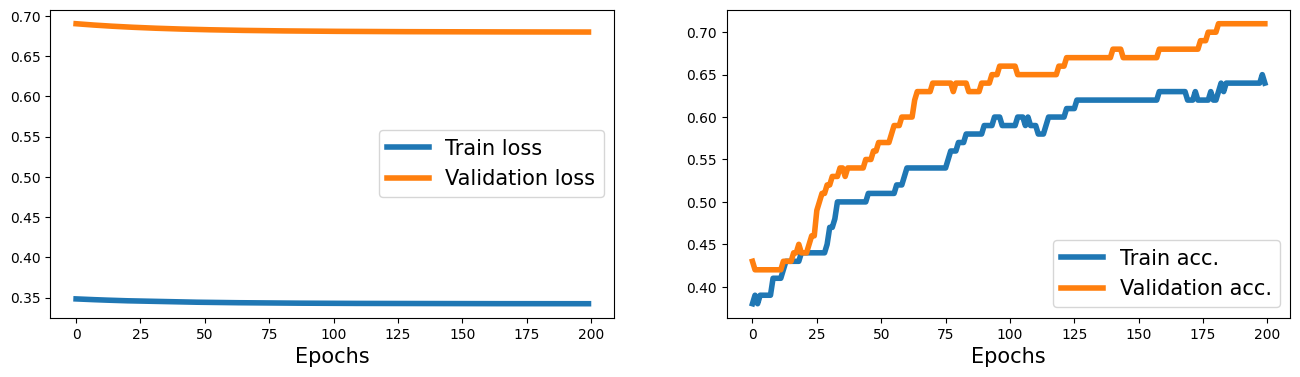

In [72]:
#plot the training performance
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 2, 1)
plt.plot(history[0], lw = 4)
plt.plot(history[1], lw = 4)
plt.legend(['Train loss', 'Validation loss'], fontsize = 15)
ax.set_xlabel('Epochs', size=15)
ax = fig.add_subplot(1, 2, 2)
plt.plot(history[2], lw = 4)
plt.plot(history[3], lw = 4)
plt.legend(['Train acc.', 'Validation acc.'], fontsize =15)
ax.set_xlabel('Epochs', size=15)

Deep models are prone to exploding gradient problem

In [73]:
model = nn.Sequential(nn.Linear(2,4), nn.ReLU(), nn.Linear(4,4), nn.ReLU(), nn.Linear(4,1), nn.Sigmoid())
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.015)
model

Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): ReLU()
  (2): Linear(in_features=4, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=1, bias=True)
  (5): Sigmoid()
)

In [74]:
history = train(model, num_epochs, train_dl, x_valid, y_valid)

Text(0.5, 0, 'Epochs')

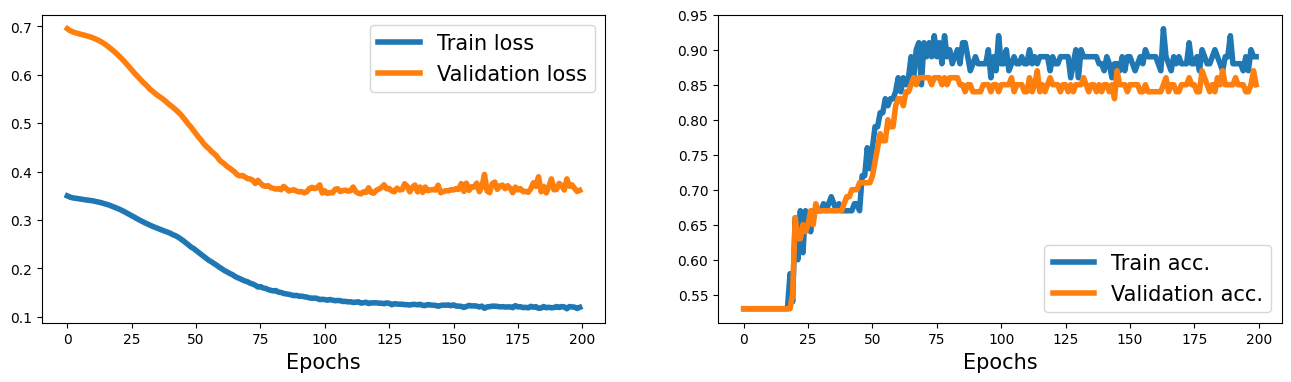

In [75]:
#plot the training performance
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 2, 1)
plt.plot(history[0], lw = 4)
plt.plot(history[1], lw = 4)
plt.legend(['Train loss', 'Validation loss'], fontsize = 15)
ax.set_xlabel('Epochs', size=15)
ax = fig.add_subplot(1, 2, 2)
plt.plot(history[2], lw = 4)
plt.plot(history[3], lw = 4)
plt.legend(['Train acc.', 'Validation acc.'], fontsize =15)
ax.set_xlabel('Epochs', size=15)

### Making Model building more flexible with nn.Module
The nn.Sequential is convenient way of building the models. However, it doesn't allows us to create more complex models that have multiple input, output, or intermediate branches.

In [76]:
class MyModule(nn.Module):
  def __init__(self):
    super().__init__()
    l1 = nn.Linear(2,4)
    a1 = nn.ReLU()
    l2 = nn.Linear(4,4)
    a2 = nn.ReLU()
    l3 = nn.Linear(4,1)
    a3 = nn.Sigmoid()
    l = [l1, a1, l2, a2, l3, a3]
    self.module_list = nn.ModuleList(l)

  def forward(self, x):
    for f in self.module_list:
      x = f(x)
    return x

  def predict(self, x):#to compute the decision boundary of model. It returns predicted class 0 or 1
    x = torch.tensor(x, dtype = torch.float32)
    pred = self.forward(x)[:, 0]
    return (pred >= 0.5).float()

In [77]:
model = MyModule()

In [78]:
print(model)

MyModule(
  (module_list): ModuleList(
    (0): Linear(in_features=2, out_features=4, bias=True)
    (1): ReLU()
    (2): Linear(in_features=4, out_features=4, bias=True)
    (3): ReLU()
    (4): Linear(in_features=4, out_features=1, bias=True)
    (5): Sigmoid()
  )
)


In [79]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.015)
history = train(model, num_epochs, train_dl, x_valid, y_valid)

In [80]:
#history

Text(0.5, 0, 'Epochs')

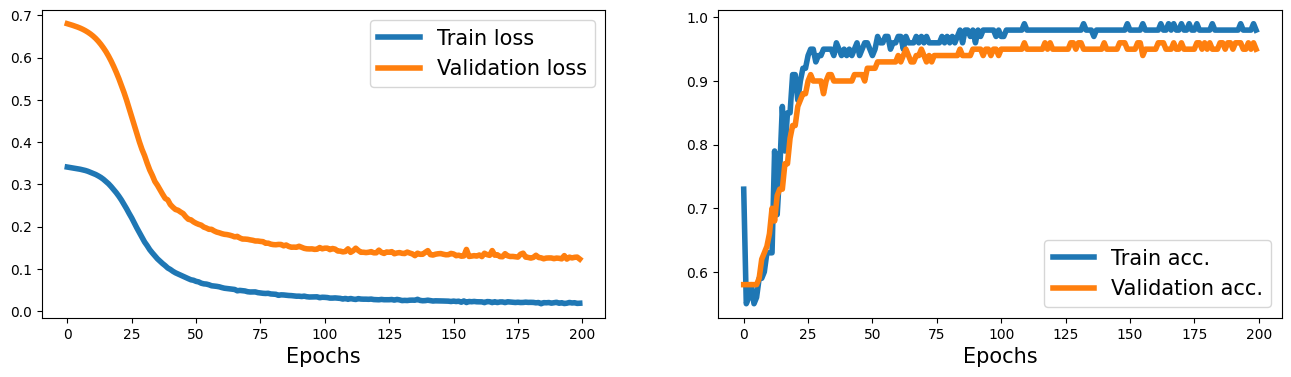

In [81]:
#plot the training performance
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 2, 1)
plt.plot(history[0], lw = 4)
plt.plot(history[1], lw = 4)
plt.legend(['Train loss', 'Validation loss'], fontsize = 15)
ax.set_xlabel('Epochs', size=15)
ax = fig.add_subplot(1, 2, 2)
plt.plot(history[2], lw = 4)
plt.plot(history[3], lw = 4)
plt.legend(['Train acc.', 'Validation acc.'], fontsize =15)
ax.set_xlabel('Epochs', size=15)

Besides the train history, mlxtend library is used to visualize the validation data and the decision boundary.

In [82]:
#conda install mlxtend -c conda-forge
!pip install mlxtend

<ipython-input-83-e889ffb562f7>:15: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  plot_decision_regions(X=x_valid.numpy(), y = y_valid.numpy().astype(np.integer), clf=model)


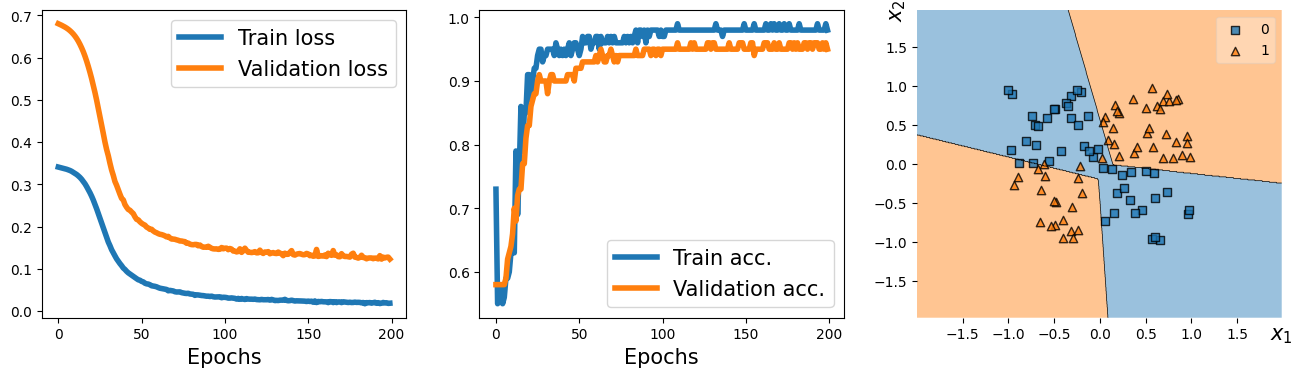

In [83]:
#below code will plot the training performance along with the decision region bias
from mlxtend.plotting import plot_decision_regions
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history[0], lw = 4)
plt.plot(history[1], lw = 4)
plt.legend(['Train loss', 'Validation loss'], fontsize = 15)
ax.set_xlabel('Epochs', size = 15)
ax = fig.add_subplot(1, 3, 2)
plt.plot(history[2], lw = 4)
plt.plot(history[3], lw = 4)
plt.legend(['Train acc.', 'Validation acc.'], fontsize = 15)
ax.set_xlabel('Epochs', size = 15)
ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=x_valid.numpy(), y = y_valid.numpy().astype(np.integer), clf=model)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size = 15)
ax.yaxis.set_label_coords(-0.025, 1)
plt.show()



#### Writing Custom Layers in Pytorch
<li> In cases where we want to define a new layer that is not already supported by PyTorch, we can define a new class derived from the nn.Module class</li>
<li> This is especially useful when designing a new layer or customizing an existing layer.</li>
<li> Simple example of Custom layer: w(x + e) + b, where e refers to a random variable as a noise variable</li>
<li> Define a new class as a subclass of nn.Module</li>
<li> Define the __init__ cunstructor and the forward() method</li>
<li> In the constructor define the valiable and other required tensors for the customized layer</li>
<li> We can create variables and initialize them in the constructor if the input_size is given to the constructor</li>
<li> Alternatively, we can delay the variable initialization and delegate it to another method for late variable creation</li>

In [84]:
class NoisyLinear(nn.Module):
  def __init__(self, input_size, output_size, noise_stddev = 0.1):
    super().__init__()
    w = torch.Tensor(input_size, output_size)
    self.w = nn.Parameter(w) #nn.Parameter is a Tensor that's a module parameter
    nn.init.xavier_uniform_(self.w)
    b = torch.Tensor(output_size).fill_(0)
    self.b = nn.Parameter(b)
    self.noise_stddev = noise_stddev

  def forward(self, x, training=False):
    if training:
      noise = torch.normal(0.0, self.noise_stddev, x.shape)
      x_new = torch.add(x, noise)
    else:
      x_new = x
    return torch.add(torch.mm(x_new, self.w), self.b)

In [85]:
#Checking the above code
torch.manual_seed(1)
noisy_layer = NoisyLinear(4, 2)
x = torch.zeros((1, 4))
print(noisy_layer(x, training = True))


tensor([[ 0.1154, -0.0598]], grad_fn=<AddBackward0>)


In [86]:
print(noisy_layer(x, training = True))

tensor([[ 0.0432, -0.0375]], grad_fn=<AddBackward0>)


In [87]:
print(noisy_layer(x, training = False))

tensor([[0., 0.]], grad_fn=<AddBackward0>)


In [88]:
# Note in the above three print functions, first two gave some output while the output of third print is 0 because we didn't add noise by specifying 'training=False'

In [89]:
#Now let's create a new model similar to previous one to solve the XOR classification task.
class MyNoisyModule(nn.Module):
  def __init__(self):
    super().__init__()
    self.l1 = NoisyLinear(2, 4, 0.07)
    self.a1 = nn.ReLU()
    self.l2 = nn.Linear(4, 4)
    self.a2 = nn.ReLU()
    self.l3 = nn.Linear(4, 1)
    self.a3 = nn.Sigmoid()

  def forward(self, x, training=False):
    x = self.l1(x, training)
    x = self.a1(x)
    x = self.l2(x)
    x = self.a2(x)
    x = self.l3(x)
    x = self.a3(x)
    return x

  def predict(self, x):
    x = torch.tensor(x, dtype=torch.float32)
    pred = self.forward(x)[:, 0]
    return(pred >= 0.5).float()

torch.manual_seed(1)
model = MyNoisyModule()
model

MyNoisyModule(
  (l1): NoisyLinear()
  (a1): ReLU()
  (l2): Linear(in_features=4, out_features=4, bias=True)
  (a2): ReLU()
  (l3): Linear(in_features=4, out_features=1, bias=True)
  (a3): Sigmoid()
)

In [90]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.015)
torch.manual_seed(1)
loss_hist_train = [0] * num_epochs
accuracy_hist_train = [0] * num_epochs
loss_hist_valid = [0] * num_epochs
accuracy_hist_valid = [0] * num_epochs
for epoch in range(num_epochs):
  for x_batch, y_batch in train_dl:
    pred = model(x_batch, True)[:, 0]
    loss = loss_fn(pred, y_batch)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    loss_hist_train[epoch] += loss.item()
    is_correct = ( (pred>=0.5).float() == y_batch).float()
    accuracy_hist_train[epoch] += is_correct.mean()
  loss_hist_train[epoch] /= 100/batch_size
  accuracy_hist_train[epoch] /= 100/batch_size
  pred = model(x_valid)[:, 0]
  loss = loss_fn(pred, y_valid)
  loss_hist_valid[epoch] = loss.item()
  is_correct = ((pred >=0.5).float() == y_valid).float()
  accuracy_hist_valid[epoch] += is_correct.mean()


<ipython-input-91-675945b7df05>:13: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  plot_decision_regions(X=x_valid.numpy(), y = y_valid.numpy().astype(np.integer), clf=model)


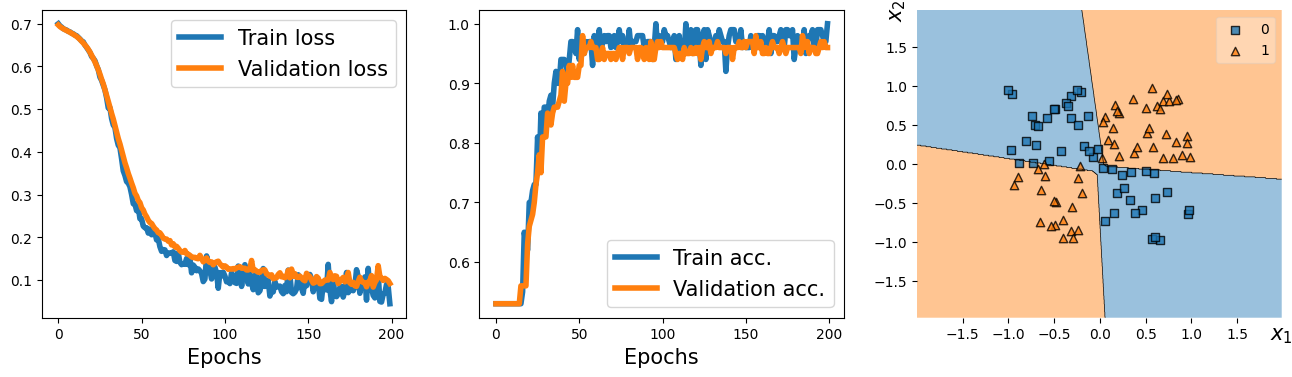

In [91]:
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(loss_hist_train, lw = 4)
plt.plot(loss_hist_valid, lw = 4)
plt.legend(['Train loss', 'Validation loss'], fontsize = 15)
ax.set_xlabel('Epochs', size = 15)
ax = fig.add_subplot(1, 3, 2)
plt.plot(accuracy_hist_train, lw = 4)
plt.plot(accuracy_hist_valid, lw = 4)
plt.legend(['Train acc.', 'Validation acc.'], fontsize = 15)
ax.set_xlabel('Epochs', size = 15)
ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=x_valid.numpy(), y = y_valid.numpy().astype(np.integer), clf=model)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size = 15)
ax.yaxis.set_label_coords(-0.025, 1)
plt.show()
